# What is MA plot?

[MA plot](https://en.wikipedia.org/wiki/MA_plot) shows the log average (`A`) on the $x$-axis and the log ratio (`M`) on the $y$-axis. Here, `M` stands for `minus` because $log(A/B) = logA-logB$

Similar plots are [Bland-Altman plot](https://en.wikipedia.org/wiki/Bland%E2%80%93Altman_plot), [Tukey mean-difference plot](https://dl.acm.org/doi/abs/10.5555/529269), mean-difference plot, or [MD plot](https://academic.oup.com/nar/article/43/7/e47/2414268). 

This type of plot is good to show the data distribution between two individuals or two groups. Examples include:

- show data distribution in two replicates or two groups to identify systematic bias (if normalization is needed)
- show gene expression distribution comparing A to B, potentially highlighting differentially expressed genes, and/or other gene categories such as housekeeping genes, highly variable genes.


![](https://upload.wikimedia.org/wikipedia/commons/6/63/Pre-normalization.MAplot.png)


In [50]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [51]:
df = pd.read_csv("/home/yli11/tmp/results.KO_vs_WT.csv",sep="\t",index_col=0)
df.head()

,logFC,AveExpr,t,P.Value,adj.P.Val,B,WT_1_log2CPM,WT_2_log2CPM,WT_3_log2CPM,KO_1_log2CPM,KO_2_log2CPM,KO_3_log2CPM
gene,,,,,,,,,,,,
D17H6S56E-5,-3.0830,9.3418,-97.669,2.276800e-15,3.597600e-11,25.102,10.8880,10.9120,10.8500,7.7671,7.8119,7.8218
Scd1,-2.2133,6.1060,-50.068,1.151200e-12,9.095200e-09,19.799,7.2574,7.1911,7.1920,5.0828,4.9264,4.9864
Coro2a,-1.4558,7.9154,-46.998,2.073900e-12,1.092300e-08,19.285,8.6433,8.6614,8.6256,7.1924,7.2202,7.1495
Plxnb2,-2.9373,3.6346,-42.033,5.854300e-12,1.598600e-08,17.639,5.0743,5.1443,5.1107,2.2122,2.2622,2.0040
Gzmb,-1.8469,4.9198,-41.606,6.436800e-12,1.598600e-08,18.097,5.7934,5.8635,5.8686,3.9655,3.9610,4.0665


## compare between replicates

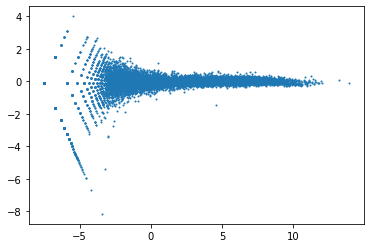

In [26]:
A = (df['WT_1_log2CPM']+df['WT_2_log2CPM'])/2
M = df['WT_1_log2CPM']-df['WT_2_log2CPM']
plt.scatter(x=A,y=M,s=1) # s is point size

## compare between two samples from different group

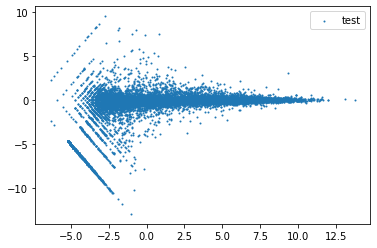

In [59]:
A = (df['WT_1_log2CPM']+df['KO_1_log2CPM'])/2
M = df['WT_1_log2CPM']-df['KO_1_log2CPM']
plt.scatter(x=A,y=M,s=1) # s is point size
plt.legend(["test"])

## compare between groups

In [20]:
# extract column names, you can also just type column names manually
WT_column_names = [x for x in df.columns if "WT" in x] # When using only 'if', put 'for' in the beginning
KO_column_names = [x for x in df.columns if "KO" in x] # When using only 'if', put 'for' in the beginning
print (WT_column_names)
print (KO_column_names)

['WT_1_log2CPM', 'WT_2_log2CPM', 'WT_3_log2CPM']
['KO_1_log2CPM', 'KO_2_log2CPM', 'KO_3_log2CPM']


In [42]:
a=[1,2,3,"asd"]
a

[1, 2, 3, 'asd']

In [43]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [45]:
[i/2 for i in range(0,10)]

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]

In [46]:
output = []
for i in range(0,10):
    output.append(i/2)
output

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]

In [47]:
df.columns

Index(['logFC', 'AveExpr', 't', 'P.Value', 'adj.P.Val', 'B', 'WT_1_log2CPM',
       'WT_2_log2CPM', 'WT_3_log2CPM', 'KO_1_log2CPM', 'KO_2_log2CPM',
       'KO_3_log2CPM'],
      dtype='object')

In [48]:
df.shape

(15801, 12)

In [49]:
[i for i in df.columns if "W" in i]

['WT_1_log2CPM', 'WT_2_log2CPM', 'WT_3_log2CPM']

Text(0, 0.5, 'log fold change')

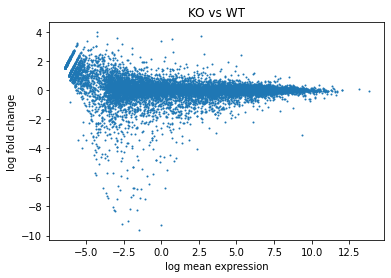

In [25]:
A = (df[WT_column_names].mean(axis=1)+df[KO_column_names].mean(axis=1))/2
M = df[KO_column_names].mean(axis=1)-df[WT_column_names].mean(axis=1)
plt.scatter(x=A,y=M,s=1) # s is point size
## add cosmetics
plt.title("KO vs WT")
plt.xlabel("log mean expression")
plt.ylabel("log fold change")

In [52]:
df.head()

,logFC,AveExpr,t,P.Value,adj.P.Val,B,WT_1_log2CPM,WT_2_log2CPM,WT_3_log2CPM,KO_1_log2CPM,KO_2_log2CPM,KO_3_log2CPM
gene,,,,,,,,,,,,
D17H6S56E-5,-3.0830,9.3418,-97.669,2.276800e-15,3.597600e-11,25.102,10.8880,10.9120,10.8500,7.7671,7.8119,7.8218
Scd1,-2.2133,6.1060,-50.068,1.151200e-12,9.095200e-09,19.799,7.2574,7.1911,7.1920,5.0828,4.9264,4.9864
Coro2a,-1.4558,7.9154,-46.998,2.073900e-12,1.092300e-08,19.285,8.6433,8.6614,8.6256,7.1924,7.2202,7.1495
Plxnb2,-2.9373,3.6346,-42.033,5.854300e-12,1.598600e-08,17.639,5.0743,5.1443,5.1107,2.2122,2.2622,2.0040
Gzmb,-1.8469,4.9198,-41.606,6.436800e-12,1.598600e-08,18.097,5.7934,5.8635,5.8686,3.9655,3.9610,4.0665


In [53]:
hk_genes = HemData.get_housekeeping_genes()
hk_genes

/home/yli11/.conda/envs/captureC/lib/python3.8/site-packages/HemTools/HemData.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  names = pd.read_csv(f"{pdir}/../HemData/index.tsv", sep="\s", header=None, index_col=0)[1].to_dict()


,Mouse,Human
0,1600012H06Rik,C6orf120
1,1700123O20Rik,C14orf119
2,1810009A15Rik,C11orf98
3,1810013L24Rik,C16orf72
4,2610507B11Rik,KIAA0100
...,...,...
1125,Zmynd19,ZMYND19
1126,Zranb1,ZRANB1
1127,Zranb2,ZRANB2
1128,Zrsr1,ZRSR2


/home/yli11/.conda/envs/captureC/lib/python3.8/site-packages/HemTools/HemData.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  names = pd.read_csv(f"{pdir}/../HemData/index.tsv", sep="\s", header=None, index_col=0)[1].to_dict()


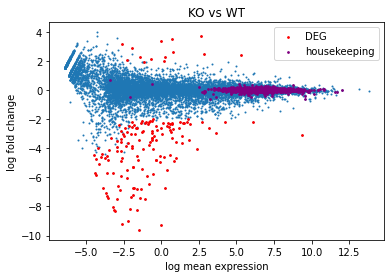

In [56]:
A = (df[WT_column_names].mean(axis=1)+df[KO_column_names].mean(axis=1))/2
M = df[KO_column_names].mean(axis=1)-df[WT_column_names].mean(axis=1)
plt.scatter(x=A,y=M,s=1) # s is point size

# deg
deg = df[(df['logFC'].abs()>=2)&(df['adj.P.Val']<=0.01)]
degA = (deg[WT_column_names].mean(axis=1)+deg[KO_column_names].mean(axis=1))/2
degM = deg[KO_column_names].mean(axis=1)-deg[WT_column_names].mean(axis=1)
plt.scatter(x=degA,y=degM,s=3,color="red",label="DEG") # s is point size

from HemTools import HemData
hk_genes = HemData.get_housekeeping_genes()

# deg
hk = df.loc[df.index.intersection(hk_genes.Mouse)]
hkA = (hk[WT_column_names].mean(axis=1)+hk[KO_column_names].mean(axis=1))/2
hkM = hk[KO_column_names].mean(axis=1)-hk[WT_column_names].mean(axis=1)
plt.scatter(x=hkA,y=hkM,s=3,color="purple",label="housekeeping") # s is point size


## add cosmetics
plt.title("KO vs WT")
plt.xlabel("log mean expression")
plt.ylabel("log fold change")
plt.legend()

## add more gene categories
- differentially expressed genes
- housekeeping genes

/home/yli11/.conda/envs/captureC/lib/python3.8/site-packages/HemTools/HemData.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  names = pd.read_csv(f"{pdir}/../HemData/index.tsv", sep="\s", header=None, index_col=0)[1].to_dict()


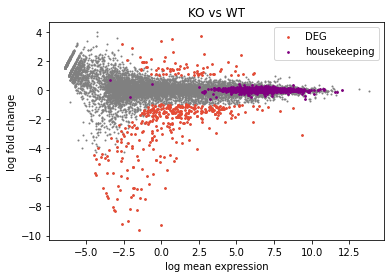

In [41]:
A = (df[WT_column_names].mean(axis=1)+df[KO_column_names].mean(axis=1))/2
M = df[KO_column_names].mean(axis=1)-df[WT_column_names].mean(axis=1)

deg = df[(df['logFC'].abs()>=1)&(df['adj.P.Val']<=0.01)]
# Tip: use Ctrl+D (Windows) or Command + D (Mac) to do multi-selection and replace
degA = (deg[WT_column_names].mean(axis=1)+deg[KO_column_names].mean(axis=1))/2
degM = deg[KO_column_names].mean(axis=1)-deg[WT_column_names].mean(axis=1)

from HemTools import HemData
hk_genes = HemData.get_housekeeping_genes()
hk = df.loc[df.index.intersection(hk_genes.Mouse)]
# Tip: use Ctrl+D (Windows) or Command + D (Mac) to do multi-selection and replace
hkA = (hk[WT_column_names].mean(axis=1)+hk[KO_column_names].mean(axis=1))/2
hkM = hk[KO_column_names].mean(axis=1)-hk[WT_column_names].mean(axis=1)


plt.scatter(x=A,y=M,s=1,color="grey") # s is point size
plt.scatter(x=degA,y=degM,s=3,color="#E64B35",label="DEG") # s is point size
plt.scatter(x=hkA,y=hkM,s=3,color="purple",label="housekeeping") # s is point size

## add cosmetics
plt.title("KO vs WT")
plt.xlabel("log mean expression")
plt.ylabel("log fold change")
plt.legend()